<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 4</h2></center>
<center><h3>Image</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Guillermo Cortés Medina</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Operaciones usando Pytorch y OpenCV

### 1.1 Instala Numpy, Pytorch y OpenCV: 
- Carga una imagen desde un archivo con extensión JPG, usando numpy, pytorch y opencv.
- Presenta la imagen
- Transforma la imagen de color a escala de grises usando cada uno de los paquetes
- Guarda la imagen nueva.
- Presenta la imagen transformada en el notebook.

<p align="justify">
Asegurate de presentar adecuandamente la imagen, usando Matplotlib u otro medio de ploteo.

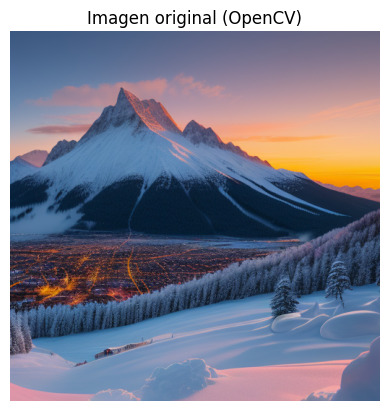

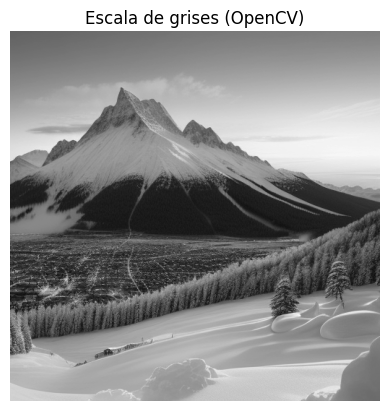

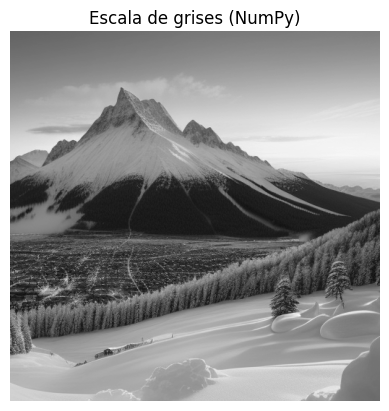

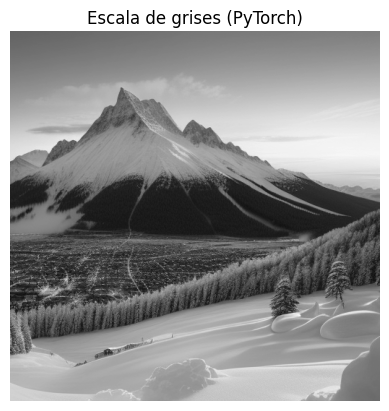

In [ ]:
import numpy as np
import torch
import cv2
from matplotlib import pyplot as plt

# Cargar imagen con OpenCV
img_cv2 = cv2.imread("image.png")

# Convertir de BGR (por defecto de OpenCV) a RGB
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)

# Mostrar la imagen
plt.imshow(img_cv2_rgb)
plt.title("Imagen original (OpenCV)")
plt.axis('off')
plt.show()

# Convertir a NumPy y a PyTorch
img_np = np.array(img_cv2_rgb)
img_torch = torch.from_numpy(img_np).permute(2, 0, 1).float() / 255.0  # Normalizada entre 0 y 1

gray_cv2 = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY)
cv2.imwrite("gray_opencv.jpg", gray_cv2)  # Guardar

plt.imshow(gray_cv2, cmap='gray')
plt.title("Escala de grises (OpenCV)")
plt.axis('off')
plt.show()

gray_np = 0.299 * img_np[:, :, 0] + 0.587 * img_np[:, :, 1] + 0.114 * img_np[:, :, 2]
gray_np = gray_np.astype(np.uint8)

cv2.imwrite("gray_numpy.jpg", gray_np)

plt.imshow(gray_np, cmap='gray')
plt.title("Escala de grises (NumPy)")
plt.axis('off')
plt.show()

r, g, b = img_torch[0], img_torch[1], img_torch[2]
gray_torch = 0.299 * r + 0.587 * g + 0.114 * b
gray_torch_uint8 = (gray_torch * 255).byte().numpy()

cv2.imwrite("gray_pytorch.jpg", gray_torch_uint8)

plt.imshow(gray_torch_uint8, cmap='gray')
plt.title("Escala de grises (PyTorch)")
plt.axis('off')
plt.show()



## 2. Multiples operaciones con tensores
### ¡USA LA IMAGEN ADJUNTA image.png!

#### 2.1 Aplica una transformación puntual. Modifica el valor de los pixeles considerando un valor de umbral (threshold). la función de treshold debe ser una rampa con una pendiente dada (tu defines el valor de la pendiente) y cuyo valor mínimo será 0 y el máximo será 255 (valores típicos de los pixeles).

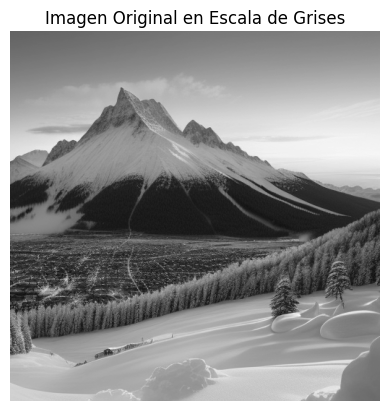

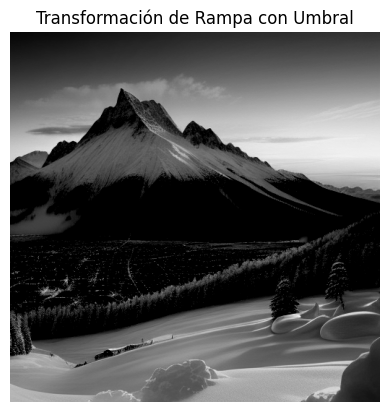

True

In [ ]:
import torch
import cv2
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises
img_gray = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)
img_tensor = torch.tensor(img_gray, dtype=torch.float32)

plt.imshow(img_tensor, cmap="gray")
plt.title("Imagen Original en Escala de Grises")
plt.axis("off")
plt.show()

def rampa_transform(img, t0=80, pendiente=1.5):
    t1 = t0 + (255 / pendiente)
    output = torch.zeros_like(img)

    # Parte lineal entre t0 y t1
    mask_middle = (img >= t0) & (img <= t1)
    output[mask_middle] = pendiente * (img[mask_middle] - t0)

    # Parte saturada a 255
    output[img > t1] = 255

    return output.clamp(0, 255)

# Aplica la transformación con t0 = 80 y pendiente = 1.5
img_rampa = rampa_transform(img_tensor, t0=80, pendiente=1.5)

# Mostrar la imagen transformada
plt.imshow(img_rampa, cmap="gray")
plt.title("Transformación de Rampa con Umbral")
plt.axis("off")
plt.show()

# Guardar resultado
cv2.imwrite("image_rampa.png", img_rampa.numpy().astype("uint8"))



#### 2.2 Aplica una transformación en la vecindad. 
- Debes hacer una vecindad con dimensiones de 5x5 pixeles. 
- Aplica la transformación de tal forma que los pixeles cambien para tener el valor correspondiente al máximo de todos los vecinos.
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.



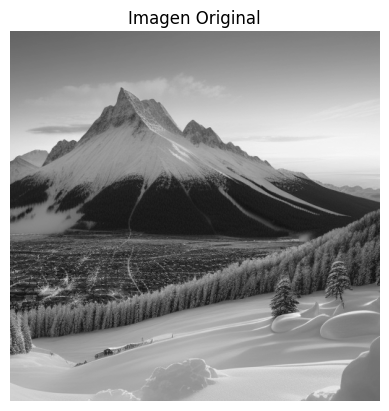

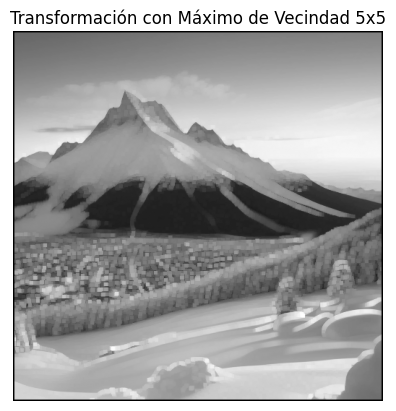

True

In [ ]:
import torch
import cv2
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises
img_gray = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)
img_tensor = torch.tensor(img_gray, dtype=torch.float32)

plt.imshow(img_tensor, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")
plt.show()

def max_vecindad_5x5(img):
    h, w = img.shape
    salida = torch.zeros_like(img)

    # Se recorre cada píxel, ignora bordes para evitar salir del límite
    for i in range(2, h - 2):
        for j in range(2, w - 2):
            # Extrae la vecindad 5x5 centrada en (i, j)
            vecindad = img[i - 2:i + 3, j - 2:j + 3]
            # Asigna el máximo de la vecindad
            salida[i, j] = torch.max(vecindad)

    return salida

img_max_5x5 = max_vecindad_5x5(img_tensor)

plt.imshow(img_max_5x5, cmap="gray")
plt.title("Transformación con Máximo de Vecindad 5x5")
plt.axis("off")
plt.show()

# Guardar la imagen
cv2.imwrite("image_max_5x5.png", img_max_5x5.numpy().astype("uint8"))


#### 2.3 Aplica transformación de intensidad
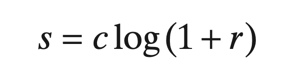
- Debes hacer una vecindad con dimensiones de 10x10 pixeles. 
- Aplica la transformación que aparece en la ecuación de tal forma que los pixeles cambien dependiendo de la posición (r) y el coeficiente c (de tu elección).
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.

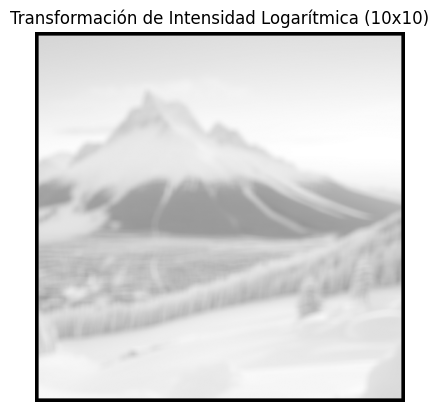

True

In [ ]:
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Cargar imagen en escala de grises
img_gray = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)
img_tensor = torch.tensor(img_gray, dtype=torch.float32)

import math

def log_transform_10x10(img, c=30.0):
    h, w = img.shape
    salida = torch.zeros_like(img)

    # Recorre evitando bordes (5 píxeles por cada lado)
    for i in range(5, h - 5):
        for j in range(5, w - 5):
            vecindad = img[i - 5:i + 5, j - 5:j + 5]
            promedio = torch.mean(vecindad)
            salida[i, j] = c * math.log(1 + promedio.item())  # usamos math.log porque es escalar

    return salida.clamp(0, 255)

img_log = log_transform_10x10(img_tensor, c=30.0)

plt.imshow(img_log, cmap="gray")
plt.title("Transformación de Intensidad Logarítmica (10x10)")
plt.axis("off")
plt.show()

# Guardar imagen
cv2.imwrite("image_log_10x10.png", img_log.numpy().astype("uint8"))


#### 2.4 Operación con Kernel
- Realiza tres operaciones de convolución en cascada. 
- Utiliza torch nn.Conv2d
- Debes calcular el stride, padding y demás parámetros para que obtengas 16 canales de salida.
- Muestra una imagen de cada canal resultante de la convolución.

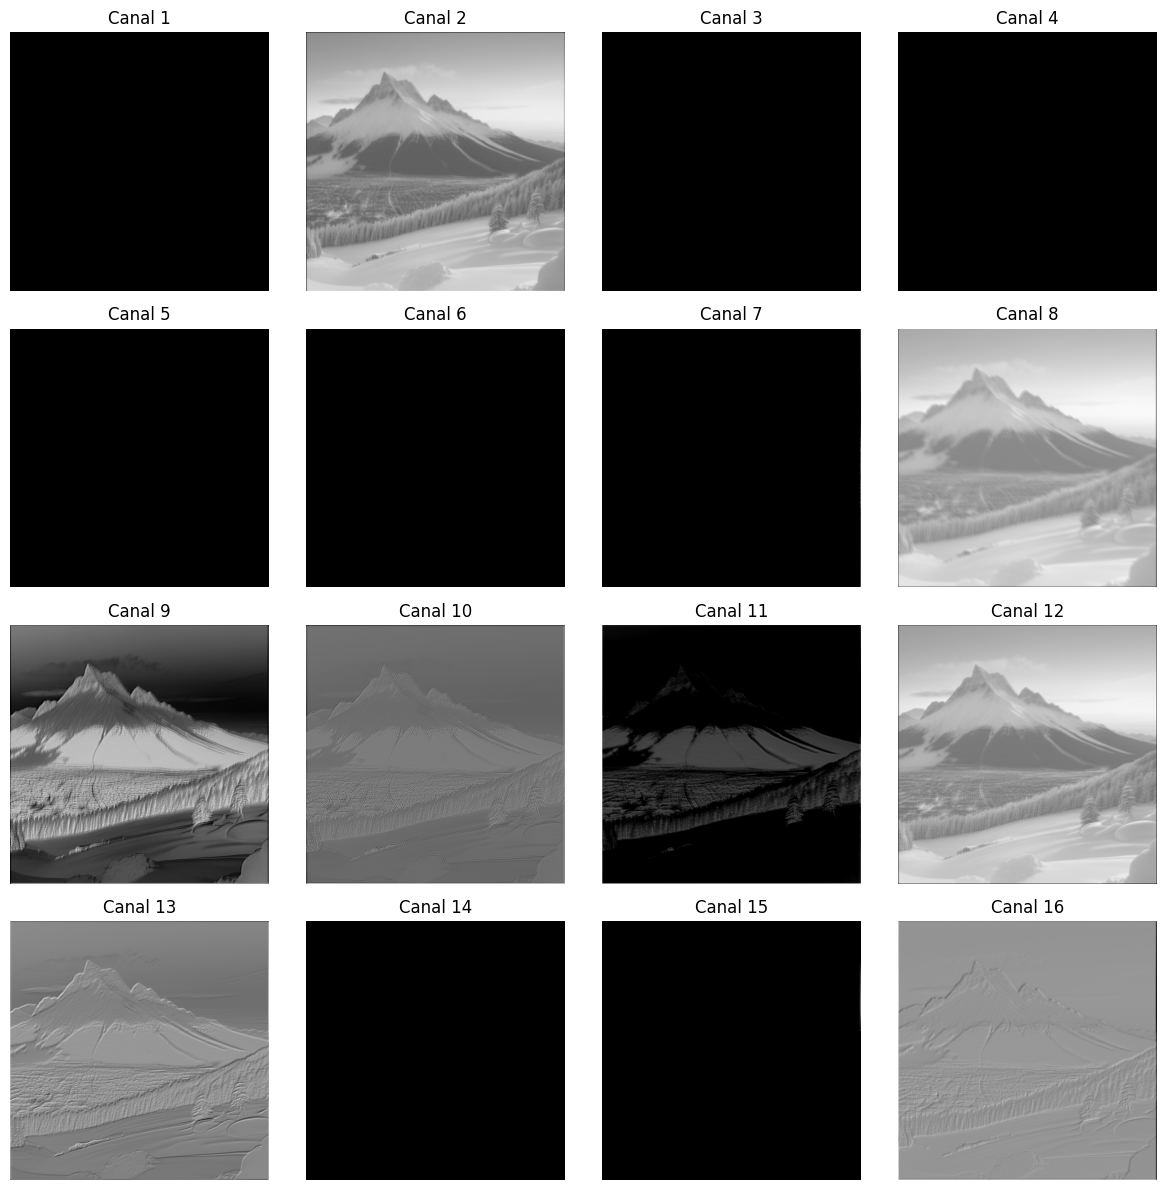

In [ ]:
import torch
import torch.nn as nn
import cv2
import matplotlib.pyplot as plt

img_gray = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)
img_tensor = torch.tensor(img_gray, dtype=torch.float32) / 255.0  # Normalizamos
img_tensor = img_tensor.unsqueeze(0).unsqueeze(0)  # [1, 1, H, W] -> batch, channels, height, width

conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
conv2 = nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, stride=1, padding=1)
conv3 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)

# Encadenar convoluciones
x = conv1(img_tensor)
x = torch.relu(x)

x = conv2(x)
x = torch.relu(x)

x = conv3(x)
x = torch.relu(x)  # [1, 16, H, W]

# Elimina batch dimension y convierte a numpy
output_channels = x.squeeze(0).detach().numpy()

# Mostrar los 16 canales
fig, axs = plt.subplots(4, 4, figsize=(12, 12))
for i in range(16):
    ax = axs[i // 4, i % 4]
    ax.imshow(output_channels[i], cmap='gray')
    ax.set_title(f'Canal {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()


## 3. Realiza la inversión de imagen

### 3.1 Utilizando estrictamente numpy, busca y usa una imagen binaria y realizar la inversión de dicha imagen.
### Recuerda adjuntar la imagen a la entrega de tu trabajo.


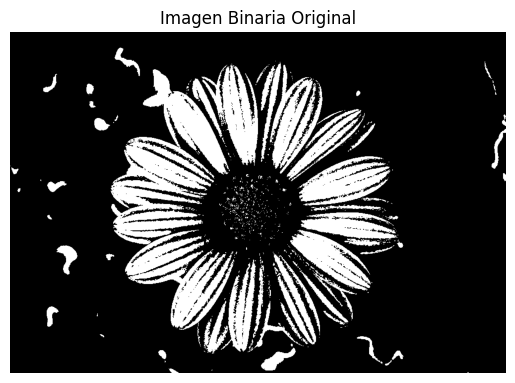

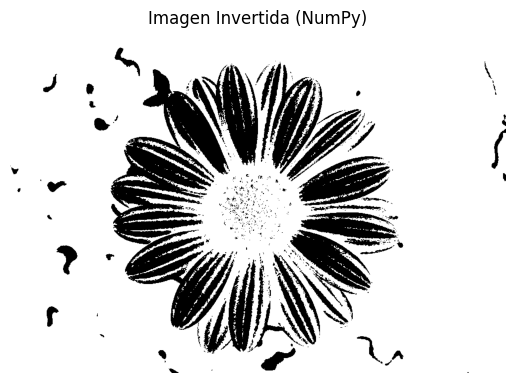

True

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Cargar la imagen binaria
img_bin = cv2.imread("imagen_binaria.png", cv2.IMREAD_GRAYSCALE)

# Mostrar imagen original
plt.imshow(img_bin, cmap="gray")
plt.title("Imagen Binaria Original")
plt.axis("off")
plt.show()

# Inversión estrictamente con NumPy
img_invertida = 255 - img_bin

plt.imshow(img_invertida, cmap="gray")
plt.title("Imagen Invertida (NumPy)")
plt.axis("off")
plt.show()

# Guardar la imagen invertida
cv2.imwrite("binaria_invertida.png", img_invertida)


### 3.1 Usando Pytorch y opencv, realiza la inversión de la misma imagen.



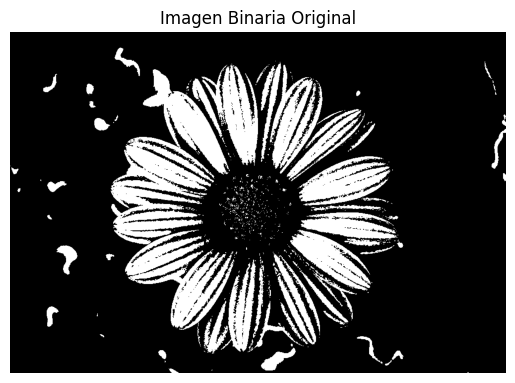

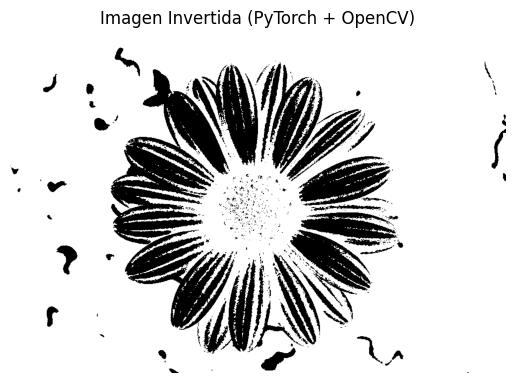

True

In [ ]:
import cv2
import torch
import matplotlib.pyplot as plt

img_bin = cv2.imread("imagen_binaria.png", cv2.IMREAD_GRAYSCALE)

# Mostrar imagen original
plt.imshow(img_bin, cmap="gray")
plt.title("Imagen Binaria Original")
plt.axis("off")
plt.show()

# Convertir a tensor
img_tensor = torch.tensor(img_bin, dtype=torch.uint8)

# Invertir: 255 - valor original
img_invertida_tensor = 255 - img_tensor

# Convertir de nuevo a NumPy
img_invertida_np = img_invertida_tensor.numpy()

# Mostrar resultado
plt.imshow(img_invertida_np, cmap="gray")
plt.title("Imagen Invertida (PyTorch + OpenCV)")
plt.axis("off")
plt.show()

# Guardar imagen
cv2.imwrite("binaria_invertida_pytorch.png", img_invertida_np)


## 4. Segmentación de imagen
#### 4.1 Realiza un algoritmo para dividir una imagen con 3 canales RGB de 512x512, en parches (secciones) de 16x16. Presenta cada parche generado de la imagen.
El algoritmo debe tolerar el cambio de imagen por una de menor tamano (128, 64). Claramente, en cada caso el número de parches será menor. 
    

Tamaño imagen: 512x512x3
Se generaron 1024 parches de 16x16.


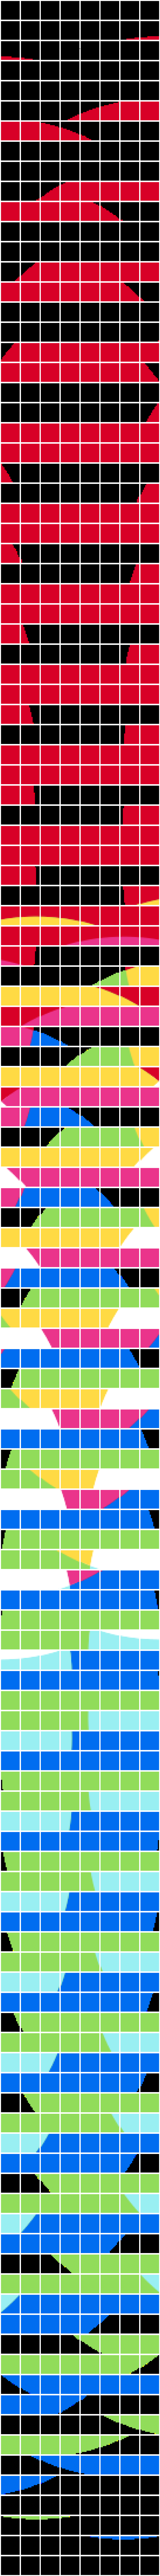

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Cargar imagen y convertir de BGR a RGB
img = cv2.imread("imagen_rgb.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Obtener dimensiones
H, W, C = img_rgb.shape
print(f"Tamaño imagen: {H}x{W}x{C}")

def dividir_en_patches(img, patch_size=16):
    H, W, C = img.shape
    patches = []

    for i in range(0, H, patch_size):
        for j in range(0, W, patch_size):
            # verifica que el parche esté dentro de los limites
            if i + patch_size <= H and j + patch_size <= W:
                patch = img[i:i+patch_size, j:j+patch_size, :]
                patches.append(patch)

    return patches

patches = dividir_en_patches(img_rgb, patch_size=16)
print(f"Se generaron {len(patches)} parches de 16x16.")

# Mostrar todos los parchess
cols = 8  # número de columnas en la grilla de parches
rows = int(np.ceil(len(patches) / cols))

fig, axs = plt.subplots(rows, cols, figsize=(cols*2, rows*2))

for idx, patch in enumerate(patches):
    ax = axs[idx // cols, idx % cols] if rows > 1 else axs[idx]
    ax.imshow(patch)
    ax.axis("off")

# Ocultar celdas vacías si hay
for idx in range(len(patches), rows * cols):
    ax = axs[idx // cols, idx % cols] if rows > 1 else axs[idx]
    ax.axis("off")

plt.suptitle("Parches 16x16")
plt.tight_layout()
plt.show()


## 5. Referencias
<p align="justify">
    
[OpenCV] https://docs.opencv.org/4.x/d7/da8/tutorial_table_of_content_imgproc.html

[inversion] https://medium.com/analytics-vidhya/inverting-an-image-using-numpys-broadcasting-method-1f5beb7f9fa5#:~:text=In%20order%20to%20invert%20the,negation)%20operation%20to%20the%20image.
